<a href="https://colab.research.google.com/github/Akshai-Athota/Tensorflow_Learning_Projects/blob/main/SkimLit_NLP_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Donwload Data


In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 14.68 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [2]:
!ls pubmed-rct

PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [3]:
!ls pubmed-rct/PubMed_20k_RCT

dev.txt  test.txt  train.txt


In [4]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


Prepare Data

In [5]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [6]:
import os
files = [ data_dir+file_name for file_name in os.listdir(data_dir)]

for x in files:
  print(x)


/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt
/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt
/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt


In [7]:
def get_lines(file_name):

  with open(file_name,"r") as f :
    return f.readlines()

In [8]:
sample_lines = get_lines(data_dir+"train.txt")
sample_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [9]:
def make_data_samples(file_name):
  data_lines = get_lines(file_name)
  samples = []
  abstract = ""

  for line in data_lines:
    if line.startswith("###"):
      abstract = ""
    elif line.isspace():
      abstract_lines = abstract.splitlines()

      for number,text in enumerate(abstract_lines):
        sample = {}
        sample["text"] = text.split("\t")[1]
        sample["line_number"] = number
        sample["target"] = text.split("\t")[0]
        sample["total_lines"] = len(abstract_lines)-1
        samples.append(sample)
    else:
      abstract += line.lower()
  return samples

In [10]:
test_samples = make_data_samples(data_dir+"train.txt")
test_samples[:20]

[{'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'target': 'objective',
  'total_lines': 11},
 {'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'target': 'methods',
  'total_lines': 11},
 {'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'target': 'methods',
  'total_lines': 11},
 {'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'target': 'methods',
  'total_lines': 11},
 {'text': 'secondary outcome measures included the western ontario and mcmaster universi

Make Data Dictonaries

In [11]:
%%time

train_data = make_data_samples(data_dir+"train.txt")
test_data = make_data_samples(data_dir+"test.txt")
valid_data = make_data_samples(data_dir+"dev.txt")


CPU times: user 537 ms, sys: 101 ms, total: 638 ms
Wall time: 884 ms


In [12]:
print(train_data[:5],test_data[:5],valid_data[:5])

[{'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .', 'line_number': 0, 'target': 'objective', 'total_lines': 11}, {'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .', 'line_number': 1, 'target': 'methods', 'total_lines': 11}, {'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .', 'line_number': 2, 'target': 'methods', 'total_lines': 11}, {'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .', 'line_number': 3, 'target': 'methods', 'total_lines': 11}, {'text': 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index sc

In [13]:
print(len(train_data),len(test_data),len(valid_data))

180040 30135 30212


In [14]:
train_data[:15]

[{'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'target': 'objective',
  'total_lines': 11},
 {'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'target': 'methods',
  'total_lines': 11},
 {'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'target': 'methods',
  'total_lines': 11},
 {'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'target': 'methods',
  'total_lines': 11},
 {'text': 'secondary outcome measures included the western ontario and mcmaster universi

Format Data

In [15]:
import pandas as pd

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
val_df = pd.DataFrame(valid_data)

In [16]:
len(train_df),len(test_df),len(val_df)

(180040, 30135, 30212)

In [17]:
train_df.head(5)

,text,line_number,target,total_lines
0,to investigate the efficacy of @ weeks of dail...,0,objective,11
1,a total of @ patients with primary knee oa wer...,1,methods,11
2,outcome measures included pain reduction and i...,2,methods,11
3,pain was assessed using the visual analog pain...,3,methods,11
4,secondary outcome measures included the wester...,4,methods,11


In [18]:
train_df.describe()

,line_number,total_lines
count,180040.000000,180040.000000
mean,5.894568,11.789136
std,4.127672,3.236095
min,0.000000,3.000000
25%,3.000000,10.000000
50%,6.000000,11.000000
75%,9.000000,14.000000
max,30.000000,30.000000


In [19]:
train_df.target.value_counts()

,count
target,
methods,59353
results,57953
conclusions,27168
background,21727
objective,13839


<Axes: >

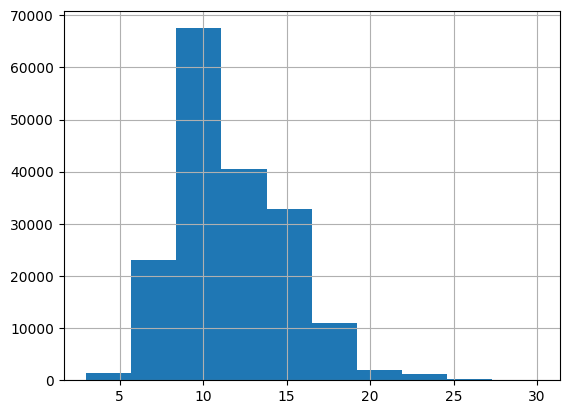

In [20]:
train_df.total_lines.hist()

Get Text

In [21]:
train_sentences = train_df.text.to_list()
test_sentences = test_df.text.to_list()
val_sentences = val_df.text.to_list()

In [22]:
len(train_sentences),len(test_sentences),len(val_sentences)

(180040, 30135, 30212)

In [23]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

Encode Labels

In [24]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))

In [25]:
train_labels_one_hot[:10]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [26]:
one_hot_classes=one_hot_encoder.categories_
one_hot_classes

[array(['background', 'conclusions', 'methods', 'objective', 'results'],
       dtype=object)]

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_labels_enocded = label_encoder.fit_transform(train_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())

In [28]:
train_labels_enocded[:10]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4])

In [29]:
class_names = label_encoder.classes_
print(class_names)
len(class_names)

['background' 'conclusions' 'methods' 'objective' 'results']


5

Model 0

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])


model_0.fit(train_sentences,train_labels_enocded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences,val_labels_encoded)*100

72.1832384482987

In [ ]:
predictions=model_0.predict(test_sentences)
predictions

array([2, 2, 2, ..., 4, 4, 4])

In [ ]:
test_labels_encoded

array([0, 4, 4, ..., 4, 4, 1])

Evaluate

In [73]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true,y_pred)*100
  precision,recall,f1_score,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")

  return {"accuracy":accuracy,"precision":precision,"recall":recall,"f1_score":f1_score}

In [ ]:
model_0_results=evaluate_model(test_labels_encoded,predictions)
model_0_results

{'accuracy': 71.6674962667994,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994,
 'f1_score': 0.6925101703856846}

Vectorize && Embed The inputs

In [ ]:
sentences_len = [len(sentence.split())  for sentence in train_sentences]

In [ ]:
max(sentences_len)

296

In [ ]:
import numpy as np

mean_len = np.mean(sentences_len)
mean_len

26.338269273494777

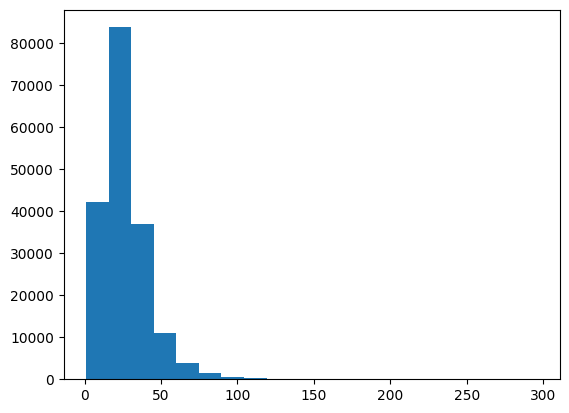

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sentences_len,bins=20)
plt.show()


In [ ]:
max_len = int(np.percentile(sentences_len,95))
max_len

55

In [ ]:
max_tokens = 68000

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

text_vectorizer  = TextVectorization(max_tokens=max_tokens,output_sequence_length=max_len)
text_vectorizer.adapt(train_sentences)


In [ ]:
text_vectorizer_vocabulary = text_vectorizer.get_vocabulary()

In [ ]:
text_vectorizer_vocabulary

['',
 '[UNK]',
 'the',
 'and',
 'of',
 'in',
 'to',
 'with',
 'a',
 'were',
 'was',
 'for',
 'patients',
 'group',
 'p',
 'at',
 'or',
 'study',
 'on',
 'treatment',
 'is',
 'after',
 'by',
 'this',
 'groups',
 'as',
 'an',
 'from',
 'that',
 'randomized',
 'between',
 'not',
 'trial',
 'no',
 'compared',
 'control',
 'be',
 'significant',
 'intervention',
 'significantly',
 'n',
 'months',
 'than',
 'we',
 'vs',
 'rsb',
 'lsb',
 'clinical',
 'placebo',
 'baseline',
 'ci',
 'two',
 'during',
 'weeks',
 'both',
 'had',
 'primary',
 'mean',
 'are',
 'using',
 'participants',
 'there',
 'all',
 'time',
 'years',
 'pain',
 'therapy',
 'who',
 'mg',
 'more',
 'effect',
 'effects',
 'but',
 'risk',
 'difference',
 'outcomes',
 'total',
 'care',
 'rate',
 'efficacy',
 'received',
 'associated',
 'higher',
 'respectively',
 'days',
 'analysis',
 'outcome',
 'use',
 'one',
 'week',
 'women',
 'may',
 'randomly',
 'levels',
 'followup',
 'will',
 'increased',
 'health',
 'used',
 'have',
 'data'

In [ ]:
sample_vectorized_sentence = text_vectorizer([train_sentences[0]])
sample_vectorized_sentence

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[   6,  331,    2,   79,    4,   53,    4,  161, 1127,  217, 2535,
           5,  557,   65, 1584,    3,  670, 5559,  636,    5,    2,  654,
        1137,    3,  180,    2,   70,  495,   36,  781,   15,   53,    5,
         350,  266,    7,  362,    6,  289,  517, 1430, 1743,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
from tensorflow.keras.layers import Embedding

embedding = Embedding(
    input_dim = int(len(text_vectorizer_vocabulary)),
    output_dim = 128,
    input_length = max_len,
    mask_zero = True
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
sample_embedding = embedding(sample_vectorized_sentence)
sample_embedding

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.01671382, -0.0199144 ,  0.02332118, ..., -0.00778525,
         -0.03865411,  0.01455541],
        [-0.0212738 ,  0.04832891, -0.02116366, ...,  0.03340163,
         -0.02207879,  0.02949752],
        [-0.02937332,  0.00922389, -0.02923702, ...,  0.02360878,
          0.04779828, -0.04402808],
        ...,
        [ 0.00494454,  0.04883057,  0.03597448, ..., -0.00845398,
          0.00314454,  0.01581598],
        [ 0.00494454,  0.04883057,  0.03597448, ..., -0.00845398,
          0.00314454,  0.01581598],
        [ 0.00494454,  0.04883057,  0.03597448, ..., -0.00845398,
          0.00314454,  0.01581598]]], dtype=float32)>

Covert into batches

In [ ]:
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
test_data = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))
val_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))

In [ ]:
train_data

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_data = train_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

Model 1

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,GlobalAvgPool1D,Dense,Dropout

input = Input(shape=(1,),dtype=tf.string)
text_vectors = text_vectorizer(input)
embedding_vectors = embedding(text_vectors)
x=Conv1D(filters=32,kernel_size=5,activation="relu")(embedding_vectors)
x=GlobalAvgPool1D()(x)
x=Dense(32,activation="relu")(x)
x=Dropout(0.5)(x)
output=Dense(len(class_names),activation="softmax")(x)

model_1 = tf.keras.Model(input,output)

model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 51, 32)              │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,321,381 (31.74 MB)

 Trainable params: 8,321,381 (31.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model_1=model_1.fit(train_data,epochs=3,steps_per_epoch=int(len(train_data))+1,validation_data=val_data,validation_steps=int(0.1*len(val_data))+1)

Epoch 1/3
5627/5628 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6605 - loss: 0.8563

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5628/5628 ━━━━━━━━━━━━━━━━━━━━ 61s 10ms/step - accuracy: 0.6605 - loss: 0.8562 - val_accuracy: 0.7911 - val_loss: 0.5490
Epoch 2/3
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 57s 10ms/step - accuracy: 0.8023 - loss: 0.5643 - val_accuracy: 0.8155 - val_loss: 0.5066
Epoch 3/3
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 53s 9ms/step - accuracy: 0.8409 - loss: 0.4662 - val_accuracy: 0.8125 - val_loss: 0.5464


In [ ]:
model_1.evaluate(val_data)

945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8096 - loss: 0.5424


[0.5439208745956421, 0.8114656209945679]

In [ ]:
predictions = model_1.predict(test_data)

942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
predictions

array([[2.2696780e-01, 2.9395657e-02, 5.0881582e-01, 2.0930925e-01,
        2.5511419e-02],
       [2.4971034e-02, 2.0258134e-02, 7.4986941e-01, 2.0532308e-02,
        1.8436913e-01],
       [2.0293392e-04, 9.6165204e-05, 9.0211874e-01, 1.6760717e-04,
        9.7414553e-02],
       ...,
       [1.5201550e-06, 6.0739000e-03, 1.7460024e-04, 6.3184920e-08,
        9.9374992e-01],
       [1.5812412e-04, 2.1811035e-02, 7.3020286e-03, 1.8982593e-05,
        9.7070980e-01],
       [1.3611563e-03, 3.0062750e-01, 2.0647391e-03, 8.5562657e-05,
        6.9586104e-01]], dtype=float32)

In [ ]:
predictions.shape

(30135, 5)

In [ ]:
prediction_labels = tf.argmax(predictions,axis=1)
prediction_labels

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([2, 2, 2, ..., 4, 4, 4])>

In [ ]:
model_1_results = evaluate_model(test_labels_encoded,prediction_labels)
model_1_results

{'accuracy': 80.63713290194127,
 'precision': 0.8037707145755414,
 'recall': 0.8063713290194127,
 'f1_score': 0.8035089101612658}

In [ ]:
model_0_results

{'accuracy': 71.6674962667994,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994,
 'f1_score': 0.6925101703856846}

Model 2

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
tf_hub_embedding_layer

In [ ]:
tf_hub_embedding_layer(tf.constant([train_sentences[0]]))

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-4.90380153e-02,  5.24623394e-02,  3.95998657e-02,
        -6.31776527e-02, -7.30676949e-02,  6.28731400e-02,
         3.52799073e-02, -6.18203878e-02,  5.71083054e-02,
         4.63245325e-02,  7.16570392e-02,  2.51986482e-03,
        -9.52070113e-03,  6.51004305e-03,  3.80009077e-02,
         3.74653973e-02, -7.96469226e-02,  6.41185567e-02,
         3.50537561e-02, -3.88272889e-02,  1.50759863e-02,
        -1.20222997e-02,  1.47859305e-02, -2.70261224e-02,
         1.51410513e-02,  5.35054207e-02, -6.14336506e-03,
        -3.47358137e-02, -7.48624578e-02,  2.86217057e-03,
        -5.25581911e-02,  7.89910331e-02,  7.17563331e-02,
         1.59457605e-02, -6.31276146e-02,  1.22191785e-02,
        -1.35266101e-02, -3.82610969e-02, -1.69011895e-02,
        -6.66884333e-02, -4.18503769e-02,  7.29317218e-02,
        -1.60359237e-02, -5.26477471e-02,  6.90131262e-02,
         6.53062165e-02, -3.43542211e-02, -3.79559770e-02,
      

In [ ]:
samples=[]
for text,label in train_data.take(1):
  for indx,text in enumerate(text):
    embedding=tf.squeeze(tf_hub_embedding_layer(tf.constant([text.numpy()])))
    samples.append((embedding,label[indx]))


samples


[(<tf.Tensor: shape=(512,), dtype=float32, numpy=
  array([-4.90380079e-02,  5.24623394e-02,  3.95998582e-02, -6.31776452e-02,
         -7.30676949e-02,  6.28731400e-02,  3.52798924e-02, -6.18203953e-02,
          5.71083054e-02,  4.63245474e-02,  7.16570467e-02,  2.51984573e-03,
         -9.52070579e-03,  6.51002256e-03,  3.80008928e-02,  3.74653749e-02,
         -7.96469301e-02,  6.41185567e-02,  3.50537598e-02, -3.88272889e-02,
          1.50759928e-02, -1.20223174e-02,  1.47859361e-02, -2.70261299e-02,
          1.51410457e-02,  5.35054170e-02, -6.14335109e-03, -3.47358473e-02,
         -7.48624504e-02,  2.86216591e-03, -5.25581948e-02,  7.89910331e-02,
          7.17563331e-02,  1.59457568e-02, -6.31276146e-02,  1.22191329e-02,
         -1.35266120e-02, -3.82610895e-02, -1.69011932e-02, -6.66884407e-02,
         -4.18503769e-02,  7.29317144e-02, -1.60359200e-02, -5.26477359e-02,
          6.90131113e-02,  6.53062165e-02, -3.43542434e-02, -3.79559696e-02,
         -4.99638803e-02, 

In [ ]:
import tensorflow as tf

def processed_embedings(text):
  embedding=tf.squeeze(tf_hub_embedding_layer(tf.constant([text])))
  return embedding


In [ ]:
train_sentences = [ processed_embedings(sentence).numpy() for sentence in train_sentences]
test_sentences = [ processed_embedings(sentence).numpy() for sentence in test_sentences]
val_sentences = [ processed_embedings(sentence).numpy() for sentence in val_sentences]

In [ ]:
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
test_data = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))
val_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))

In [ ]:
train_data

<_TensorSliceDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.float32, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_data = train_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
len(train_data)

5627

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
inputs = layers.Input(shape=(512,))
x = Dense(256, activation="relu")(inputs)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(32, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(8, activation="relu")(x)
x = Dropout(0.2)(x)
output = Dense(len(class_names), activation="softmax")(x)


model_2 = tf.keras.Model(inputs, output)

model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
model_2.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,269 (684.64 KB)

 Trainable params: 175,269 (684.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model_2 = model_2.fit(train_data,epochs=10,steps_per_epoch=int(len(train_data))+1,validation_data=val_data,validation_steps=int(0.1*len(val_data))+1)

Epoch 1/10
5627/5628 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5533 - loss: 1.1293

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5628/5628 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.5533 - loss: 1.1293 - val_accuracy: 0.6711 - val_loss: 0.8303
Epoch 2/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.6370 - loss: 0.9283 - val_accuracy: 0.7171 - val_loss: 0.7434
Epoch 3/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6709 - loss: 0.8707 - val_accuracy: 0.7224 - val_loss: 0.7268
Epoch 4/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6856 - loss: 0.8367 - val_accuracy: 0.7250 - val_loss: 0.7116
Epoch 5/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.6968 - loss: 0.8177 - val_accuracy: 0.7559 - val_loss: 0.6791
Epoch 6/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.7057 - loss: 0.8062 - val_accuracy: 0.7697 - val_loss: 0.6445
Epoch 7/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.7097 - loss: 0.7955 - val_accuracy: 0.7651 - val_loss: 0.6472
Epoch 8/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7114 - loss: 0.7973 - val

In [ ]:
model_2.evaluate(val_data)

945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7595 - loss: 0.6679


[0.6682372093200684, 0.7593340277671814]

In [ ]:
model_2_predictions = model_2.predict(test_data)

942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
final_model_2_predictions = tf.argmax(model_2_predictions,axis=1)
final_model_2_predictions

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 0, 2, ..., 4, 4, 1])>

In [ ]:
model_2_results = evaluate_model(test_labels_encoded,final_model_2_predictions)
model_2_results

{'accuracy': 71.87655550024888,
 'precision': 0.7088777597384576,
 'recall': 0.7187655550024888,
 'f1_score': 0.6963005921643229}

In [ ]:
model_1_results

{'accuracy': 80.63713290194127,
 'precision': 0.8037707145755414,
 'recall': 0.8063713290194127,
 'f1_score': 0.8035089101612658}

In [ ]:
model_0_results

{'accuracy': 71.6674962667994,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994,
 'f1_score': 0.6925101703856846}

Final Model with transfer learning,positional embeddings,Character Embeddings

In [31]:
def split_chars(sentence):
  return " ".join(list(sentence))

In [32]:
print(split_chars(train_sentences[0]))

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [33]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]

In [34]:
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [35]:
import numpy as np

char_lens =[len(sentence) for sentence in train_chars]
mean_char_len = np.mean(char_lens)
mean_char_len

297.7325149966674

(array([2.2108e+04, 7.0583e+04, 5.3952e+04, 2.2391e+04, 7.4540e+03,
        2.2350e+03, 8.0200e+02, 2.8700e+02, 1.1800e+02, 4.9000e+01,
        2.9000e+01, 1.3000e+01, 8.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.3950e+02, 2.7800e+02, 4.1650e+02, 5.5500e+02,
        6.9350e+02, 8.3200e+02, 9.7050e+02, 1.1090e+03, 1.2475e+03,
        1.3860e+03, 1.5245e+03, 1.6630e+03, 1.8015e+03, 1.9400e+03,
        2.0785e+03, 2.2170e+03, 2.3555e+03, 2.4940e+03, 2.6325e+03,
        2.7710e+03]),
 <BarContainer object of 20 artists>)

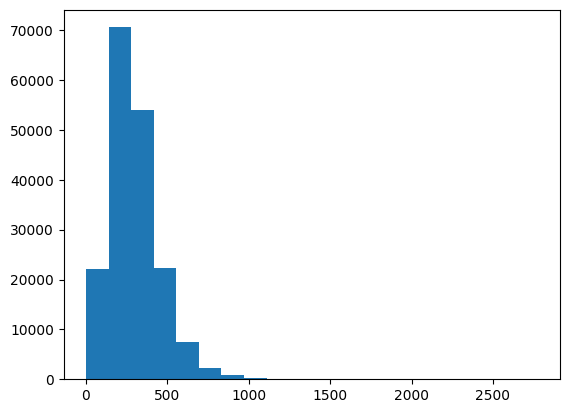

In [36]:
import matplotlib.pyplot as plt

plt.hist(char_lens,bins=20)

In [37]:
output_char_len = int(np.percentile(char_lens,95))
output_char_len

579

In [38]:
import string

char_vocabulary = string.ascii_lowercase + string.digits +string.punctuation

char_vocabulary

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
num_char_tokens = len(char_vocabulary) + 2



In [40]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

char_vectorizer = TextVectorization(max_tokens=num_char_tokens,
                                 output_sequence_length=output_char_len,
                                 standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

In [41]:
char_vectorizer.adapt(train_chars)

In [42]:
char_vectorizr_vocabulary = char_vectorizer.get_vocabulary()

In [43]:
char_vectorizr_vocabulary[:10]

['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']

In [44]:
char_vectorizr_vocabulary[-10:]

['g', 'y', 'w', 'v', 'b', 'k', 'x', 'z', 'q', 'j']

In [45]:
sample_char_token = char_vectorizer([train_chars[0]])
sample_char_token

<tf.Tensor: shape=(1, 579), dtype=int64, numpy=
array([[ 3,  7,  4,  6, 21,  2,  9,  3,  4, 18,  5,  3,  2,  3, 13,  2,
         2, 17, 17,  4, 11,  5, 11, 19,  7, 17, 20,  2,  2, 23,  9,  7,
        17, 10,  5,  4, 12, 19, 12,  7, 20, 10,  7,  9,  2,  7,  8,  5,
        12, 14,  8,  2, 10,  6,  4,  9,  7, 12,  7,  6,  2,  4,  6,  4,
        15, 14,  8,  7, 21,  4,  6, 18, 14,  5,  4,  6, 15,  7, 22,  4,
        12,  4,  3, 19,  5,  6, 10,  9, 19,  9,  3,  2, 15,  4, 11, 12,
         7, 20, 18,  8,  5, 10,  2,  4,  6, 17, 12,  5, 15, 15,  5,  3,
         4,  7,  6,  4,  6,  3, 13,  2,  9, 13,  7,  8,  3,  3,  2,  8,
        15,  5,  6, 10, 20, 13,  2,  3, 13,  2,  8,  3, 13,  2,  2, 17,
        17,  2, 11,  3, 20,  7, 16, 12, 10, 22,  2,  9, 16,  9,  3,  5,
         4,  6,  2, 10,  5,  3, 20,  2,  2, 23,  9,  4,  6,  7, 12, 10,
         2,  8,  5, 10, 16, 12,  3,  9, 20,  4,  3, 13, 15,  7, 10,  2,
         8,  5,  3,  2,  3,  7,  9,  2, 21,  2,  8,  2, 23,  6,  2,  2,
         7,  9, 

In [46]:
from tensorflow.keras.layers import Embedding

char_embed = Embedding(
    input_dim=num_char_tokens,
    output_dim=25,
    mask_zero=False,
    name="char_embedding"
)

In [47]:
char_embed(char_vectorizer([train_chars[0]]))

<tf.Tensor: shape=(1, 579, 25), dtype=float32, numpy=
array([[[-0.00432389,  0.02525279, -0.04056976, ..., -0.00723654,
         -0.03797023,  0.0135165 ],
        [-0.01582294,  0.00960711, -0.02014037, ..., -0.01439028,
          0.02048549,  0.02507392],
        [ 0.02196479,  0.04245664, -0.00881667, ...,  0.01754032,
         -0.0120733 ,  0.04130021],
        ...,
        [-0.04905585, -0.04864242,  0.04922101, ...,  0.04226452,
         -0.02117502, -0.00569674],
        [-0.04905585, -0.04864242,  0.04922101, ...,  0.04226452,
         -0.02117502, -0.00569674],
        [-0.04905585, -0.04864242,  0.04922101, ...,  0.04226452,
         -0.02117502, -0.00569674]]], dtype=float32)>

In [48]:
import tensorflow_hub as hub

hub_layer="https://tfhub.dev/google/nnlm-en-dim128/2"
text_embedings = hub.KerasLayer(hub_layer,
                                trainable=False,
                                name="text_embedings")


In [49]:
sample_text_embeding=text_embedings([train_sentences[0]])
sample_text_embeding

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 9.9785942e-01, -6.3139386e-02, -8.8238336e-02, -2.0647566e-01,
         2.2035416e-02,  4.1222148e-02, -1.0801335e-01, -2.1369649e-04,
         2.6400784e-02, -2.3756896e-03,  2.5733757e-01, -1.8594627e-03,
        -3.7186280e-01, -1.1532567e-01, -1.7109933e-01, -5.7788406e-02,
        -2.0629148e-01, -8.3993739e-03, -2.9680929e-01,  4.5028254e-01,
         1.9011450e-01,  1.4463474e-01, -2.4740405e-01, -3.7236002e-03,
         2.3135810e-01,  1.4151296e-01,  2.8124264e-01,  7.1579549e-03,
        -1.8392754e-01,  2.3659829e-02,  1.2424416e-01,  3.6482375e-02,
         1.4697679e-02, -1.9524097e-02, -4.5785476e-02,  4.7282349e-02,
         9.0339020e-02, -1.0510678e-01, -3.2036372e-02,  2.2945586e-01,
        -1.9842350e-01, -1.1781023e-01, -2.1524490e-01,  1.0223212e-01,
         5.1906705e-03,  9.9119507e-02,  2.9923802e-02,  2.2835235e-01,
         1.5751164e-01,  1.9183597e-01,  7.8425534e-02, -5.6335084e-02,
         1.349

Positional Encoding

In [50]:
train_df.line_number.value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

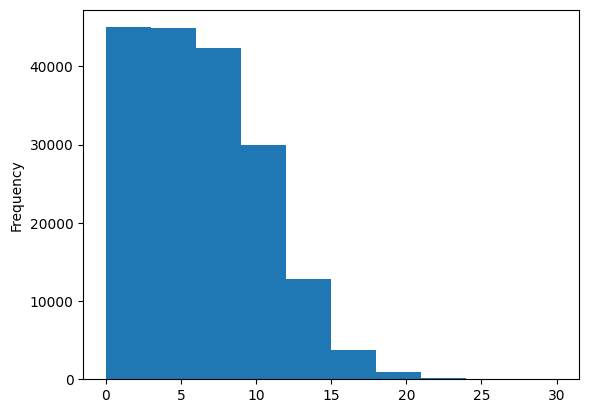

In [51]:
train_df.line_number.plot.hist()

In [52]:
train_line_number_one_hot = tf.one_hot(train_df.line_number,depth=15)
val_line_number_one_hot = tf.one_hot(val_df.line_number,depth=15)
test_line_number_one_hot = tf.one_hot(test_df.line_number,depth=15)

In [53]:
train_line_number_one_hot[0]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [54]:
train_df.total_lines.value_counts()

,count
total_lines,
11,24468
10,23639
12,22113
9,19400
13,18438
14,14610
8,12285
15,10768
7,7464


<Axes: ylabel='Frequency'>

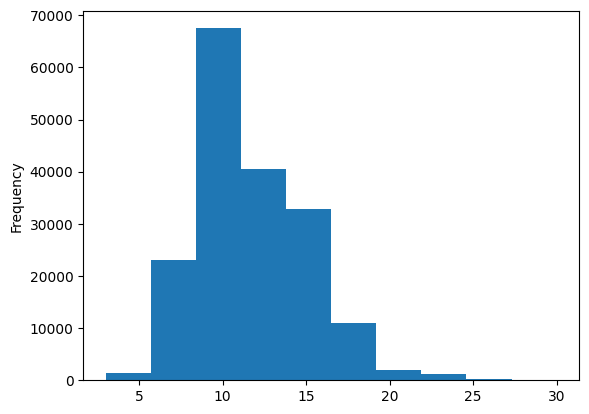

In [55]:
train_df.total_lines.plot.hist()

In [56]:
train_total_lines_one_hot = tf.one_hot(train_df.total_lines,depth=20)
val_total_lines_one_hot = tf.one_hot(val_df.total_lines,depth=20)
test_total_lines_one_hot = tf.one_hot(test_df.total_lines,depth=20)

train_total_lines_one_hot.shape

TensorShape([180040, 20])

In [57]:
train_total_lines_one_hot[0]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

Create Model

In [62]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda

token_inputs = layers.Input(shape=[],dtype="string",name="token_inputs")
token_embedings= Lambda(lambda x : text_embedings(x),output_shape=(128,))(token_inputs)
x= layers.Dense(128,activation="relu")(token_embedings)
token_model = tf.keras.Model(inputs=token_inputs,outputs=x)


char_inputs = layers.Input(shape=(1,),dtype="string",name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embedings = char_embed(char_vectors)
char_output= layers.Bidirectional(layers.LSTM(64))(char_embedings)
char_model = tf.keras.Model(inputs=char_inputs,outputs=char_output)



line_number_inputs = layers.Input(shape=(15,),dtype=tf.int32,name="line_number_inputs")
line_number_embedings = layers.Dense(15,activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,outputs=line_number_embedings)


total_lines_inputs = layers.Input(shape=(20,),dtype=tf.int32,name="total_lines_inputs")
total_lines_embedings = layers.Dense(20,activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(inputs=total_lines_inputs,outputs=total_lines_embedings)


combined_embedings = layers.Concatenate()([token_model.output,char_model.output])
x = layers.Dense(256,activation="relu")(combined_embedings)
x= layers.Dropout(0.5)(x)
x= layers.Concatenate()([x,line_number_model.output,total_lines_model.output])
x= layers.Dense(128,activation="relu")(x)
x=layers.Dropout(0.5)(x)
x=layers.Dense(64,activation="relu")(x)
x=layers.Dense(32,activation="relu")(x)
x=layers.Dense(16,activation="relu")(x)
x=layers.Dense(8,activation="relu")(x)
output=layers.Dense(5,activation="softmax")(x)
model_4 =tf.keras.Model(inputs=[token_model.input,char_model.input,line_number_model.input,total_lines_model.input],outputs=output)

model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])


In [63]:
model_4.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ char_inputs (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_inputs (InputLayer) │ (None)                 │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_vectorizer           │ (None, 579)            │              0 │ char_inputs[0][0]      │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 128)            │              0 │ token_inputs[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_embedding            │ (None, 579, 25)        │          1,750 │ char_vectorizer[1][0]  │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 128)            │         16,512 │ lambda_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 128)            │         46,080 │ char_embedding[1][0]   │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 256)            │              0 │ dense_10[0][0],        │
│ (Concatenate)             │                        │                │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 256)            │         65,792 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ line_number_inputs        │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ total_lines_inputs        │ (None, 20)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 256)            │              0 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 15)             │            240 │ line_number_inputs[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 20)             │            420 │ total_lines_inputs[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 291)            │              0 │ dropout_2[0][0],       │
│ (Concatenate)             │                        │                │ dense_11[0][0],        │
│                           │                        │                │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)     

 Total params: 179,215 (700.06 KB)

 Trainable params: 179,215 (700.06 KB)

 Non-trainable params: 0 (0.00 B)

Prepare pre-fetch data

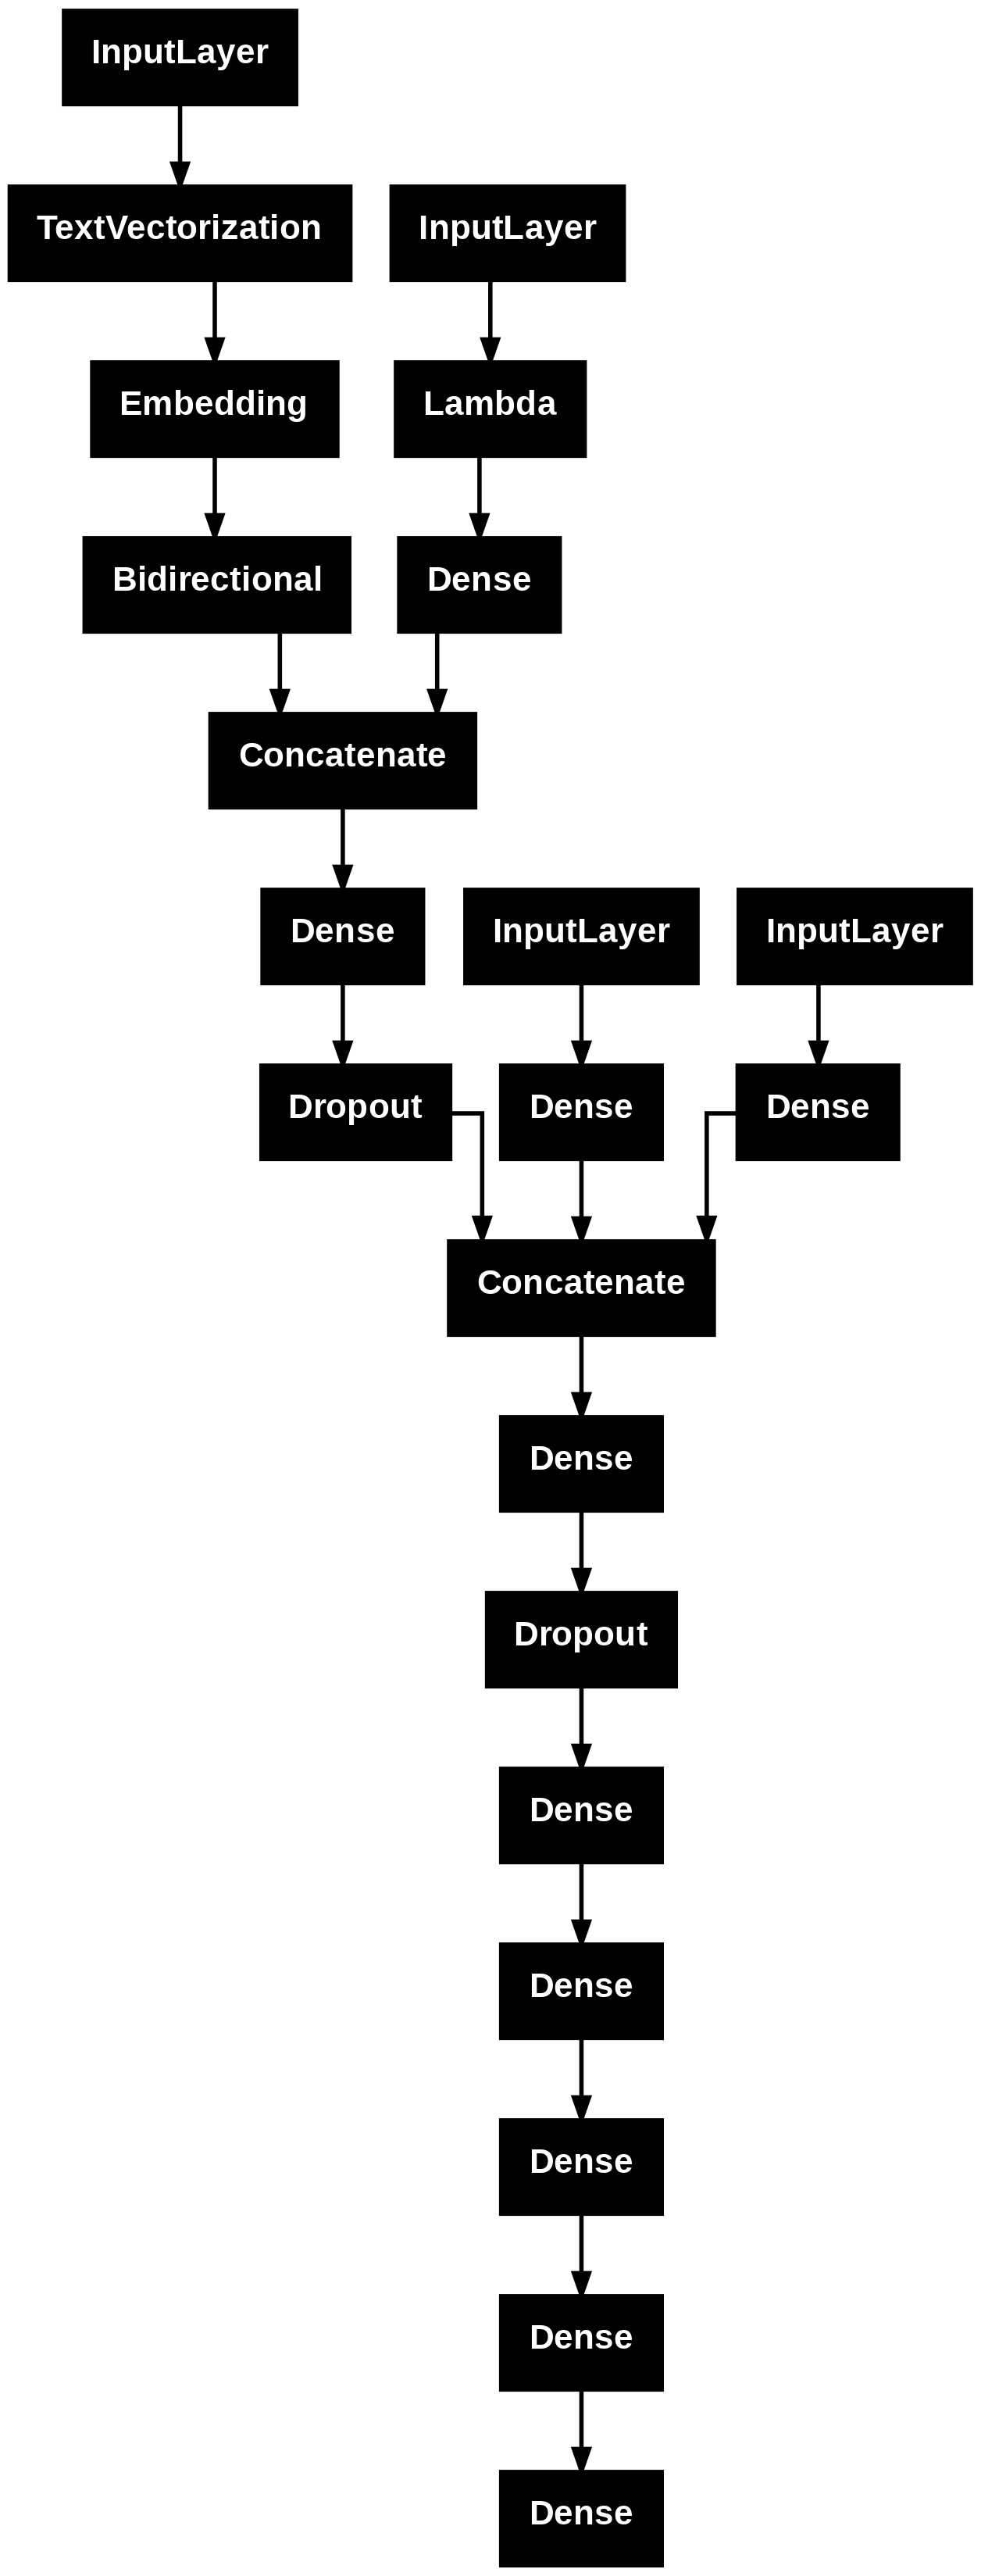

In [64]:
from tensorflow.keras.utils import plot_model

plot_model(model_4)

In [66]:
train_pos_char_text_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars,train_line_number_one_hot,train_total_lines_one_hot))
train_pos_char_text_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_pos_char_text_data = tf.data.Dataset.zip((train_pos_char_text_data,train_pos_char_text_labels))
train_pos_char_text_dataset= train_pos_char_text_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

val_pos_char_text_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_chars,val_line_number_one_hot,val_total_lines_one_hot))
val_pos_char_text_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_text_data = tf.data.Dataset.zip((val_pos_char_text_data,val_pos_char_text_labels))
val_pos_char_text_dataset = val_pos_char_text_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_pos_char_text_data = tf.data.Dataset.from_tensor_slices((test_sentences,test_chars,test_line_number_one_hot,test_total_lines_one_hot))
test_pos_char_text_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_text_data = tf.data.Dataset.zip((test_pos_char_text_data,test_pos_char_text_labels))
test_pos_char_text_dataset = test_pos_char_text_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

Train Model

In [67]:
train_pos_char_text_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [68]:
model_4_history = model_4.fit(train_pos_char_text_dataset,epochs=10,steps_per_epoch=int(len(train_pos_char_text_dataset))+1,
                              validation_data=val_pos_char_text_dataset,validation_steps=int(0.5*len(val_pos_char_text_dataset))+1)

Epoch 1/10
5627/5628 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7545 - loss: 1.0196

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5628/5628 ━━━━━━━━━━━━━━━━━━━━ 240s 41ms/step - accuracy: 0.7545 - loss: 1.0196 - val_accuracy: 0.8687 - val_loss: 0.8634
Epoch 2/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 227s 40ms/step - accuracy: 0.8568 - loss: 0.8812 - val_accuracy: 0.8733 - val_loss: 0.8517
Epoch 3/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 321s 51ms/step - accuracy: 0.8655 - loss: 0.8673 - val_accuracy: 0.8734 - val_loss: 0.8522
Epoch 4/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 265s 41ms/step - accuracy: 0.8700 - loss: 0.8598 - val_accuracy: 0.8795 - val_loss: 0.8431
Epoch 5/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 263s 41ms/step - accuracy: 0.8734 - loss: 0.8534 - val_accuracy: 0.8789 - val_loss: 0.8455
Epoch 6/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 260s 41ms/step - accuracy: 0.8789 - loss: 0.8486 - val_accuracy: 0.8790 - val_loss: 0.8441
Epoch 7/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 262s 41ms/step - accuracy: 0.8811 - loss: 0.8455 - val_accuracy: 0.8813 - val_loss: 0.8442
Epoch 8/10
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 228s 40ms/step - accuracy: 0.8832 - lo

In [69]:
model_4.evaluate(val_pos_char_text_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8813 - loss: 0.8431


[0.8438794612884521, 0.881305456161499]

In [70]:
model_4_predictions = model_4.predict(test_pos_char_text_dataset)
model_4_predictions[0]

942/942 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step


array([0.4604913 , 0.04663753, 0.07679967, 0.36112735, 0.05494411],
      dtype=float32)

In [71]:
model_4_predictions=tf.argmax(model_4_predictions,axis=1)
model_4_predictions

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 2, 2, ..., 4, 4, 1])>

In [74]:
evaluate_model(test_labels_encoded,model_4_predictions)

{'accuracy': 87.76505724240916,
 'precision': 0.8830055326741885,
 'recall': 0.8776505724240916,
 'f1_score': 0.8731303278971274}